# SUPPORT VECTOR MACHINES

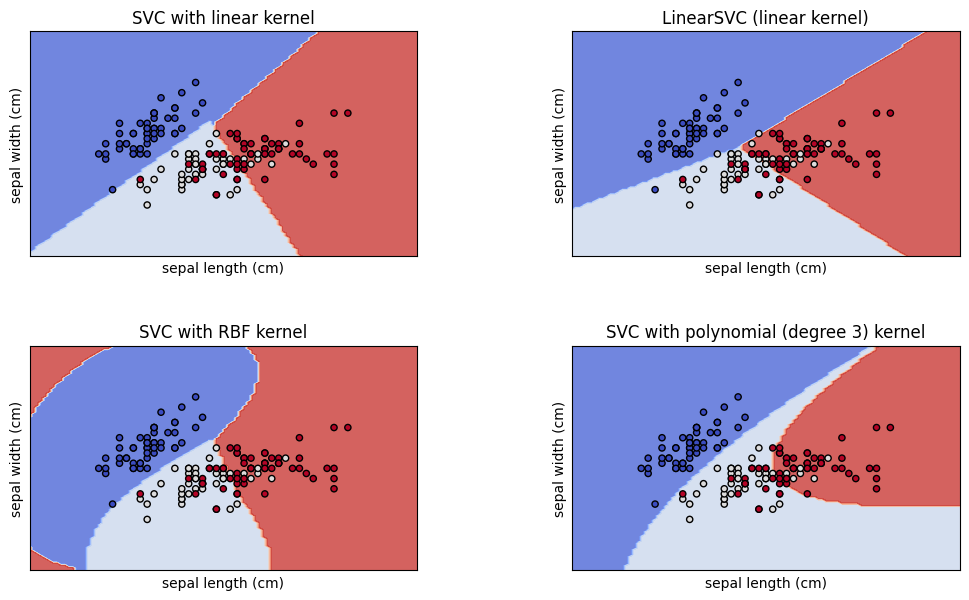

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# Import the Iris dataset
iris = datasets.load_iris()

# Take the first two features.
# We could avoid this by using a two-dimensional dataset
X = iris.data[:, :2]
y = iris.target

# Create SVM models with different kernels and fit the data
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

# Use a generator expression to fit each model
models = (clf.fit(X, y) for clf in models)

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2, figsize=(12,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# Extract the two features for plotting
X0, X1 = X[:, 0], X[:, 1]

# plt.figure(figsize=(20,10))

# Iterate over models, create decision boundary displays, and plot
for clf, title, ax in zip(models, titles, sub.flatten()):
    # Create DecisionBoundaryDisplay using the current model
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1] )
    
    # Scatter plot of the data points
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
# Display the plots
plt.show()

Modèle avec noyau linear - Exactitude : 0.9666666666666667


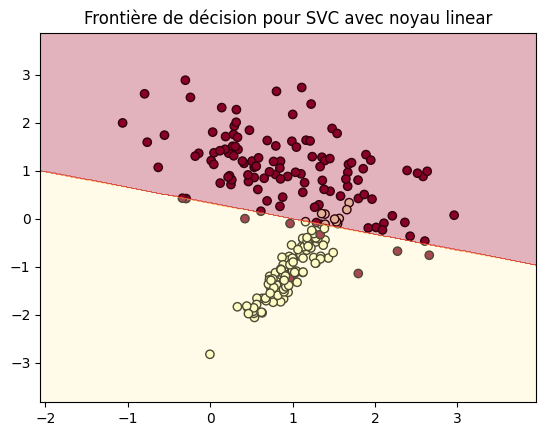

Modèle avec noyau rbf - Exactitude : 0.9666666666666667


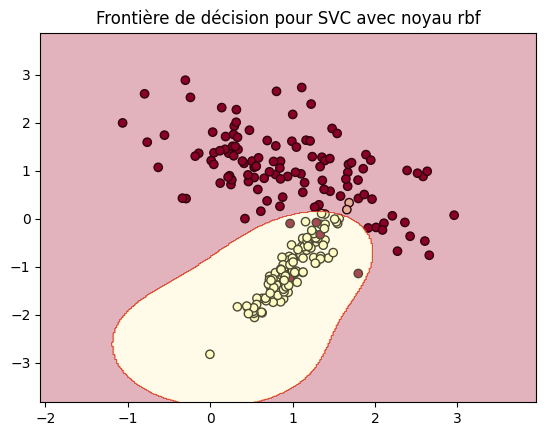

Modèle avec noyau poly - Exactitude : 0.9166666666666666


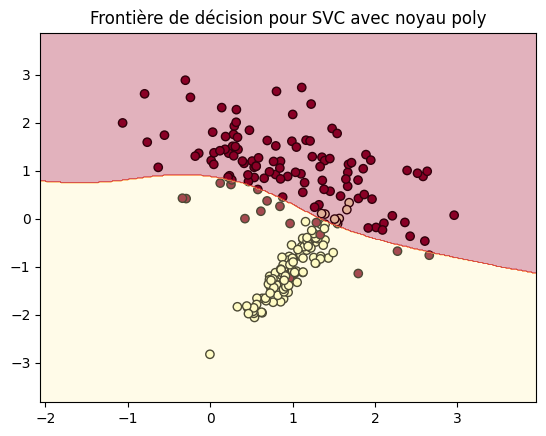

Modèle avec noyau sigmoid - Exactitude : 0.9166666666666666


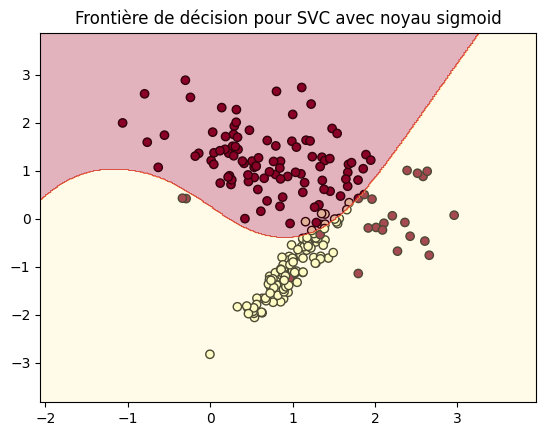

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Générer des données synthétiques pour la classification
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des noyaux à tester
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Boucle pour entraîner des modèles avec différents noyaux
for kernel in kernels:
    # Créer et entraîner le modèle SVC
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Calculer l'exactitude
    accuracy = accuracy_score(y_test, y_pred)

    # Afficher le résultat
    print(f"Modèle avec noyau {kernel} - Exactitude : {accuracy}")

    # Visualisation de la frontière de décision (pour des jeux de données bidimensionnels)
    if X_train.shape[1] == 2:
        plt.figure()
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='YlOrRd', marker='o', edgecolors='k')
        plt.title(f"Frontière de décision pour SVC avec noyau {kernel}")
        h = .02  # Taille du pas dans la grille
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap='YlOrRd', alpha=0.3)
        plt.show()

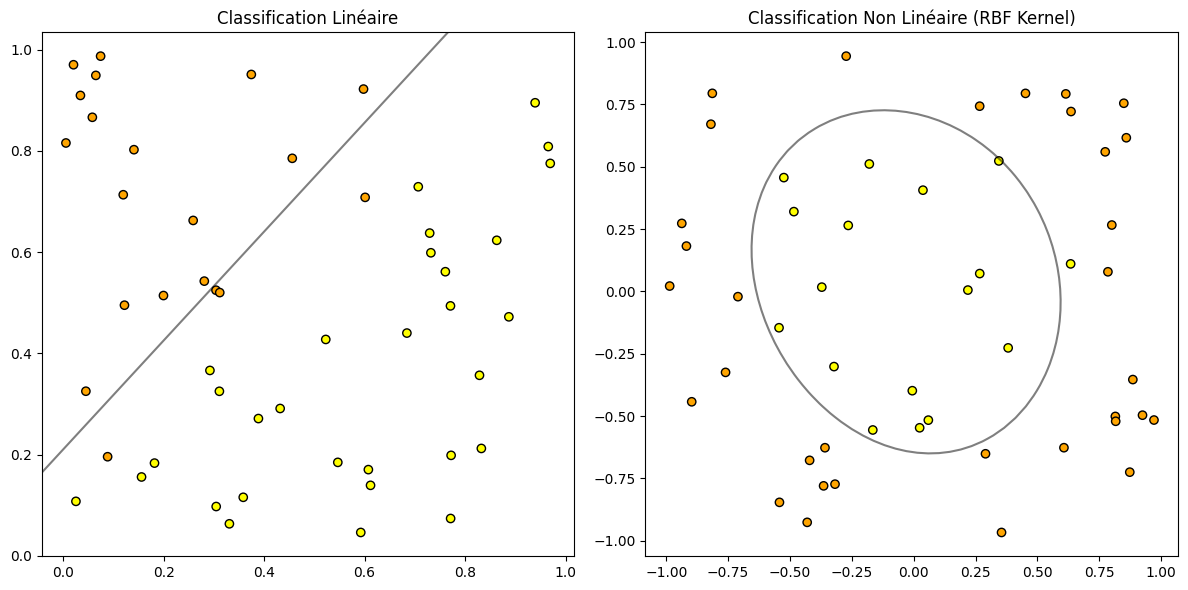

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Création de données linéairement séparables
np.random.seed(42)
X_linear = np.random.rand(50, 2)
y_linear = (X_linear[:, 1] > X_linear[:, 0] + 0.1).astype(int)

# Création de données non linéairement séparables
X_non_linear = np.random.rand(50, 2) * 2 - 1  # valeurs entre -1 et 1
y_non_linear = (X_non_linear[:, 0]**2 + X_non_linear[:, 1]**2 > 0.5).astype(int)

# Création des classificateurs SVM linéaire et non linéaire (noyau radial - RBF)
clf_linear = svm.SVC(kernel='linear')
clf_non_linear = svm.SVC(kernel='rbf', gamma=1)

# Entraînement des classificateurs
clf_linear.fit(X_linear, y_linear)
clf_non_linear.fit(X_non_linear, y_non_linear)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Subplot pour le SVM linéaire
plt.subplot(1, 2, 1)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=['orange' if label == 1 else 'yellow' for label in y_linear], edgecolors='k', marker='o', label='Classe 0')
plt.title('Classification Linéaire')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Subplot pour le SVM non linéaire
plt.subplot(1, 2, 2)
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=['orange' if label == 1 else 'yellow' for label in y_non_linear], edgecolors='k', marker='o', label='Classe 0')
plt.title('Classification Non Linéaire (RBF Kernel)')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# Tracé de la frontière de décision
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf_non_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

plt.tight_layout()
plt.show()

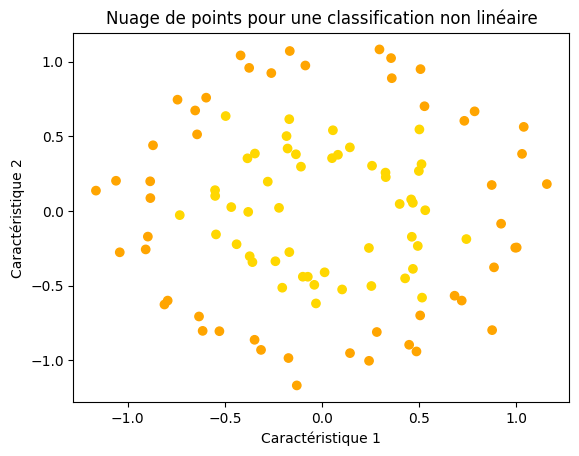

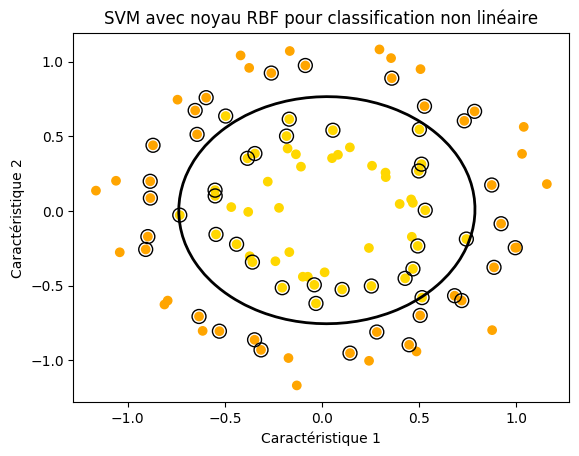

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm

# Générer des données en forme de cercles
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Définir les couleurs pour le nuage de points
colors = np.array(['orange' if label == 0 else 'gold' for label in y])

# Afficher le nuage de points
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Nuage de points pour une classification non linéaire')
plt.show()

# Créer et entraîner un SVM avec noyau RBF
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

# Afficher la frontière de décision
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Créer une grille pour évaluer le modèle
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Afficher la frontière de décision et les vecteurs de support
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('SVM avec noyau RBF pour classification non linéaire')
plt.show()